![pytorch](pytorch.jpeg)

In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

The capitalized names refer to Python classes that implement a number of popular
models. They differ in their architecture—that is, in the arrangement of the operations
occurring between the input and the output. The lowercase names are convenience
functions that return models instantiated from those classes, sometimes with different
parameter sets. For instance, resnet101 returns an instance of ResNet with 101 layers,
resnet18 has 18 layers, and so on. We’ll now turn our attention to AlexNet.

# AlexNet
The AlexNet architecture won the 2012 ILSVRC by a large margin, with a top-5 test
error rate (that is, the correct label must be in the top 5 predictions) of 15.4%. By
comparison, the second-best submission, which wasn’t based on a deep network,
trailed at 26.2%. This was a defining moment in the history of computer vision: the
moment when the community started to realize the potential of deep learning for
vision tasks. That leap was followed by constant improvement, with more modern
architectures and training methods getting top-5 error rates as low as 3%.

By today’s standards, AlexNet is a rather small network, compared to state-of-theart models. But in our case, it’s perfect for taking a first peek at a neural network that
does something and learning how to run a pretrained version of it on a new image.

In [3]:
alexnet = models.AlexNet()

In [4]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# ResNet
Using the resnet101 function, we’ll now instantiate a 101-layer convolutional neural
network. Just to put things in perspective, before the advent of residual networks in
2015, achieving stable training at such depths was considered extremely hard. Residual networks pulled a trick that made it possible, and by doing so, beat several benchmarks in one sweep that year.
 Let’s create an instance of the network now. We’ll pass an argument that will
instruct the function to download the weights of resnet101 trained on the ImageNet
dataset, with 1.2 million images and 1,000 categories:


In [5]:
resnet = models.resnet101(pretrained=True)

In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

What we are seeing here is modules, one per line. Note that they have nothing in common with Python modules: they are individual operations, the building blocks of a
neural network. They are also called layers in other deep learning frameworks.
 If we scroll down, we’ll see a lot of Bottleneck modules repeating one after the
other (101 of them!), containing convolutions and other modules. That’s the anatomy of a typical deep neural network for computer vision: a more or less sequential
cascade of filters and nonlinear functions, ending with a layer (fc) producing scores
for each of the 1,000 output classes (out_features).

The resnet variable can be called like a function, taking as input one or more
images and producing an equal number of scores for each of the 1,000 ImageNet
classes. Before we can do that, however, we have to preprocess the input images so
they are the right size and so that their values (colors) sit roughly in the same numerical range. In order to do that, the torchvision module provides transforms, which
allow us to quickly define pipelines of basic preprocessing functions:

In [7]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)])

In [8]:
preprocess

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In this case, we defined a preprocess function that will scale the input image to 256 ×256,  crop  the  image  to  224  ×  224  around  the  center,  transform  it  to  a  tensor  (aPyTorch  multidimensional  array:  in  this  case,  a  3D  array  with  color,  height,  and
width),  and  normalize  its  RGB  (red,  green,  blue)  components  so  that  they  havedefined means and standard deviations. These need to match what was presented tothe network during training, if we want the network to produce meaningful answers.

In [9]:
from PIL import Image
img = Image.open("doggo.jpg")

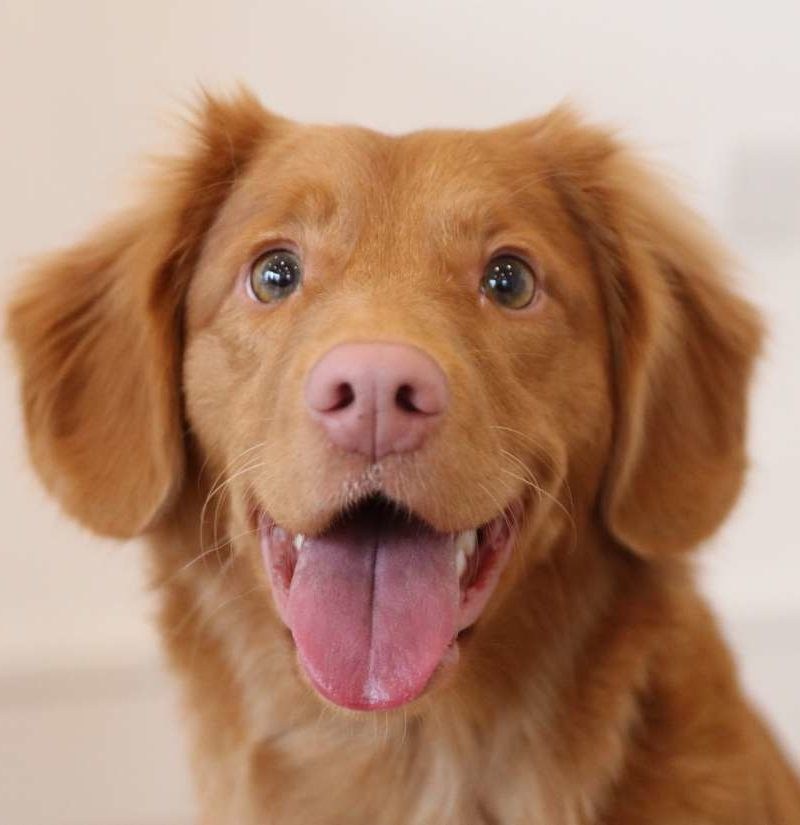

In [10]:
img

In [11]:
preprocessed_img = preprocess(img)

In [12]:
preprocessed_img

tensor([[[ 1.7352,  1.7352,  1.7352,  ...,  1.8893,  1.8893,  1.9064],
         [ 1.7352,  1.7352,  1.7352,  ...,  1.8722,  1.8893,  1.9064],
         [ 1.7352,  1.7352,  1.7352,  ...,  1.8722,  1.8893,  1.9064],
         ...,
         [ 1.5125,  1.5125,  1.5125,  ...,  0.4337,  0.4679,  0.5364],
         [ 1.5125,  1.5125,  1.5125,  ...,  0.4851,  0.5193,  0.5536],
         [ 1.5125,  1.5125,  1.5125,  ...,  0.5022,  0.5022,  0.5193]],

        [[ 1.6232,  1.6232,  1.6232,  ...,  1.9209,  1.9209,  1.9384],
         [ 1.6232,  1.6232,  1.6232,  ...,  1.9034,  1.9209,  1.9384],
         [ 1.6232,  1.6232,  1.6232,  ...,  1.9034,  1.9209,  1.9384],
         ...,
         [ 1.2906,  1.2906,  1.2906,  ..., -0.4426, -0.4076, -0.3375],
         [ 1.2906,  1.2906,  1.2906,  ..., -0.3901, -0.3550, -0.3200],
         [ 1.2906,  1.2906,  1.2906,  ..., -0.3725, -0.3725, -0.3550]],

        [[ 1.6117,  1.6117,  1.6117,  ...,  2.0997,  2.0997,  2.1171],
         [ 1.6117,  1.6117,  1.6117,  ...,  2

Then we can reshape, crop, and normalize the input tensor in a way that the network expects.

In [13]:
import torch
batch = torch.unsqueeze(preprocessed_img,0)
batch

tensor([[[[ 1.7352,  1.7352,  1.7352,  ...,  1.8893,  1.8893,  1.9064],
          [ 1.7352,  1.7352,  1.7352,  ...,  1.8722,  1.8893,  1.9064],
          [ 1.7352,  1.7352,  1.7352,  ...,  1.8722,  1.8893,  1.9064],
          ...,
          [ 1.5125,  1.5125,  1.5125,  ...,  0.4337,  0.4679,  0.5364],
          [ 1.5125,  1.5125,  1.5125,  ...,  0.4851,  0.5193,  0.5536],
          [ 1.5125,  1.5125,  1.5125,  ...,  0.5022,  0.5022,  0.5193]],

         [[ 1.6232,  1.6232,  1.6232,  ...,  1.9209,  1.9209,  1.9384],
          [ 1.6232,  1.6232,  1.6232,  ...,  1.9034,  1.9209,  1.9384],
          [ 1.6232,  1.6232,  1.6232,  ...,  1.9034,  1.9209,  1.9384],
          ...,
          [ 1.2906,  1.2906,  1.2906,  ..., -0.4426, -0.4076, -0.3375],
          [ 1.2906,  1.2906,  1.2906,  ..., -0.3901, -0.3550, -0.3200],
          [ 1.2906,  1.2906,  1.2906,  ..., -0.3725, -0.3725, -0.3550]],

         [[ 1.6117,  1.6117,  1.6117,  ...,  2.0997,  2.0997,  2.1171],
          [ 1.6117,  1.6117,  

The process of running a trained model on new data is called inference in deep learn-ing circles. In order to do inference, we need to put the network in eval mode

In [14]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

If  we  forget  to  do  that,  some  pretrained  models,  like  batch  normalization  and  dropout,will  not  produce  meaningful  answers,  just  because  of  the  way  they  work  internally.Now that eval has been set, we’re ready for inference

In [15]:
out = resnet(batch)
out

tensor([[-8.9174e-01, -5.8056e-01, -2.6240e+00, -3.7712e+00, -4.2635e+00,
         -1.2499e+00, -3.4854e+00, -9.8224e-01,  1.1212e-01, -3.3212e+00,
         -1.4265e+00, -2.9847e-01, -1.0191e+00, -3.5269e+00, -1.2813e+00,
         -2.1457e+00, -6.2695e-01, -5.3188e-01, -2.1966e+00, -1.9186e+00,
         -3.7306e+00, -1.3536e+00, -8.4131e-01,  4.6211e-01, -1.9269e+00,
         -1.0180e+00, -2.0134e+00, -6.1076e-01, -6.8549e-01, -1.6700e+00,
         -1.2840e+00, -1.9458e+00, -1.8232e+00, -2.7606e+00, -8.4157e-01,
         -2.4723e+00, -9.5564e-01, -2.0183e+00,  2.4611e-01,  1.1130e+00,
          2.3402e-01,  5.0740e-01,  2.6036e+00,  2.9920e-01,  9.7911e-03,
         -6.3280e-01,  1.7872e+00,  5.1161e-01, -1.9223e+00,  1.9305e-02,
         -2.2455e+00, -4.2791e-01, -1.3108e+00, -2.4009e+00, -2.4266e+00,
         -1.1390e+00, -7.7534e-01, -6.1459e-01, -2.9640e+00,  9.0666e-01,
          2.4409e-01, -2.0111e+00, -1.8555e-01, -2.2825e+00, -2.7279e-01,
         -3.2924e+00,  7.1126e-02, -2.

A staggering set of operations involving 44.5 million parameters has just happened, pro-ducing a vector of 1,000 scores, one per ImageNet class. That didn’t take long, did it? We now need to find out the label of the class that received the highest score. Thiswill tell us what the model saw in the image. If the label matches how a human woulddescribe the image, that’s great! It means everything is working. If not, then either some-thing went wrong during training, or the image is so different from what the modelexpects that the model can’t process it properly, or there’s some other similar issue.  To  see  the  list  of  predicted  labels,  we  will  load  a  text  file  listing  the  labels  in  thesame order they were presented to the network during training, and then we will pickout the label at the index that produced the highest score from the network. Almostall models meant for image recognition have output in a form similar to what we’reabout to work with. Let’s load the file containing the 1,000 labels for the ImageNet dataset classes

In [16]:
with open('imagenet.txt') as f:
    labels = [line.strip() for line in f.readlines()]

At this point, we need to determine the index corresponding to the maximum score in  the  out  tensor  we  obtained  previously.  We  can  do  that  using  the  max  function  in PyTorch, which outputs the maximum value in a tensor as well as the indices where that maximum value occurred

In [17]:
_,index = torch.max(out,1)

In [18]:
_

tensor([12.8094], grad_fn=<MaxBackward0>)

In [19]:
index

tensor([207])

We can now use the index to access the label. Here, index is not a plain Python number, but a one-element, one-dimensional tensor (specifically, tensor([207])), so we need to get the actual numerical value to use as an index into our labels list using index[0]. We also use torch.nn.functional.softmax to normalize our outputs to the range [0, 1], and divide by the sum. That gives us something roughly akin to the confidence that the model has in its prediction. In this case, the model is 57% certain that it knows what it’s looking at is a golden retriever.

In [20]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

("207: 'golden retriever',", 57.6741828918457)

Since the model produced scores, we can also find out what the second best, third best, and so on were. To do this, we can use the sort function, which sorts the values in ascending or descending order and also provides the indices of the sorted values in the original array:

In [21]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[("207: 'golden retriever',", 57.6741828918457),
 ("215: 'Brittany spaniel',", 21.52895736694336),
 ("209: 'Chesapeake Bay retriever',", 5.5634846687316895),
 ("852: 'tennis ball',", 5.04332160949707),
 ("205: 'flat-coated retriever',", 4.225821495056152)]